# Example to connect to postgres

This is a tutorial to connect to our PostgreSQL database using python.

First you need to install the following libraries:
- psycopg2
- python-dotenv

Then you need to create a file with the name ".env". This file will contain the connection information and your credentials. This is an example:

```
DB_HOST=host_name
DB_NAME=postgres
DB_USER=my_user
DB_PASSWORD=my_password
DB_PORT=5432
```

After that you´re all set. We will import your credentials and connect to the database.

In [1]:
import os
import psycopg2 # PostgreSQL database adapter for Python
from dotenv import load_dotenv # Reads the key-value pair from .env file and adds them to environment variable

# Load environment variables from .env file
load_dotenv()

# Accessing credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [2]:
# Connect to the database
conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port
)

Now we can query our data (write sql code) and store it as a pandas dataframe

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
query_main="""
    select * 
    from agg.merged_data
"""
df_main = pd.read_sql_query(query_main, conn)


C:\Users\Zóra\AppData\Local\Temp\ipykernel_5168\1658585201.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_main = pd.read_sql_query(query_main, conn)


In [5]:
pd.set_option('display.max_columns', None)

df_main

,site,year,month,day,hour,min,tz,soc,discharge_wh,charge_wh,production_wh,consumption_wh,gridexport_wh,gridimport_wh,pvcharge_wh,pvcons_wh,pvexport_wh,griddischarge_wh,gridcharge_wh,gridcons_wh,consdischarge_wh,mismatch_wh,ts,postcode,precipitation,precipitation_probability,wind_direction,wind_speed,solar_radiation,sunshine_duration,pred_consumption,pred_production
0,94,2019,8,6,5,15,UTC+01:00,25.0,26.28,0.00,0.0,33.73,0.0,7.45,0.0,0.0,0.0,0.0,0.00,7.45,26.28,0.0,2019-08-06 04:15:00,None,NaN,NaN,None,NaN,NaN,NaN,184.0,0.0
1,98,2019,8,6,5,15,UTC+01:00,24.0,30.58,0.00,0.0,36.61,0.0,6.03,0.0,0.0,0.0,0.0,0.00,6.03,30.58,0.0,2019-08-06 04:15:00,None,NaN,NaN,None,NaN,NaN,NaN,285.0,0.0
2,100,2019,8,6,5,15,UTC+01:00,0.0,0.00,3.36,0.0,46.62,0.0,49.98,0.0,0.0,0.0,0.0,3.36,46.62,0.00,0.0,2019-08-06 04:15:00,None,NaN,NaN,None,NaN,NaN,NaN,289.0,0.0
3,2,2019,8,6,5,30,UTC+01:00,14.0,27.63,0.00,0.0,36.11,0.0,8.48,0.0,0.0,0.0,0.0,0.00,8.48,27.63,0.0,2019-08-06 04:30:00,None,NaN,NaN,None,NaN,NaN,NaN,145.0,0.0
4,3,2019,8,6,5,30,UTC+01:00,0.0,0.00,0.75,0.0,73.80,0.0,74.55,0.0,0.0,0.0,0.0,0.75,73.80,0.00,0.0,2019-08-06 04:30:00,None,NaN,NaN,None,NaN,NaN,NaN,267.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599397,81,2019,8,6,5,15,UTC+01:00,10.0,77.57,0.00,0.0,84.08,0.0,6.51,0.0,0.0,0.0,0.0,0.00,6.51,77.57,0.0,2019-08-06 04:15:00,None,NaN,NaN,None,NaN,NaN,NaN,280.0,0.0
1599398,84,2019,8,6,5,15,UTC+01:00,71.0,12.08,0.00,0.0,19.30,0.0,7.22,0.0,0.0,0.0,0.0,0.00,7.22,12.08,0.0,2019-08-06 04:15:00,None,NaN,NaN,None,NaN,NaN,NaN,72.0,0.0
1599399,85,2019,8,6,5,15,UTC+01:00,0.0,0.00,2.70,0.0,48.77,0.0,51.47,0.0,0.0,0.0,0.0,2.70,48.77,0.00,0.0,2019-08-06 04:15:00,None,NaN,NaN,None,NaN,NaN,NaN,243.0,0.0
1599400,90,2019,8,6,5,15,UTC+01:00,5.0,34.52,0.00,0.0,41.06,0.0,6.54,0.0,0.0,0.0,0.0,0.00,6.54,34.52,0.0,2019-08-06 04:15:00,None,NaN,NaN,None,NaN,NaN,NaN,204.0,0.0


In [30]:
# Got to rename because 'min' messes it up
df_main.rename(columns={'min': 'minute'}, inplace=True)
df_main.insert(6, 'datetime', pd.to_datetime(df_main[['year', 'month', 'day', 'hour', 'minute']]))

#adding variable net_load
df_main['net_load'] = df_main['consumption_wh'] + df_main['charge_wh'] - df_main['discharge_wh'] - df_main['production_wh']

In [7]:
print(df_main["net_load"].min())
print(df_main["net_load"].max())

-1457798.7
4918.08257141


In [8]:
# Sort the DataFrame by timestamp if not already sorted
df_main.sort_values('datetime', inplace=True)

# Set the timestamp as the index if not already set
#df_main.set_index('datetime', inplace=True) --> KeyError: "None of ['datetime'] are in the columns"
df_main

,site,year,month,day,hour,minute,datetime,tz,soc,discharge_wh,charge_wh,production_wh,consumption_wh,gridexport_wh,gridimport_wh,pvcharge_wh,pvcons_wh,pvexport_wh,griddischarge_wh,gridcharge_wh,gridcons_wh,consdischarge_wh,mismatch_wh,ts,postcode,precipitation,precipitation_probability,wind_direction,wind_speed,solar_radiation,sunshine_duration,pred_consumption,pred_production,net_load
961744,94,2019,3,1,0,0,2019-03-01 00:00:00,UTC+00:00,0.0,0.00,2.92,0.0,132.41,0.0,135.33,0.0,0.0,0.0,0.0,2.92,132.41,0.00,0.00,2019-03-01 00:00:00,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,135.33
961729,46,2019,3,1,0,0,2019-03-01 00:00:00,UTC+00:00,0.0,0.00,0.75,0.0,874.01,0.0,874.76,0.0,0.0,0.0,0.0,0.75,874.01,0.00,0.00,2019-03-01 00:00:00,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,874.76
961730,49,2019,3,1,0,0,2019-03-01 00:00:00,UTC+00:00,0.0,0.00,2.55,0.0,10.39,0.0,12.94,0.0,0.0,0.0,0.0,2.55,10.39,0.00,0.00,2019-03-01 00:00:00,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,12.94
961731,50,2019,3,1,0,0,2019-03-01 00:00:00,UTC+00:00,0.0,0.00,2.70,0.0,8.41,0.0,11.11,0.0,0.0,0.0,0.0,2.70,8.41,0.00,0.00,2019-03-01 00:00:00,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,11.11
961732,53,2019,3,1,0,0,2019-03-01 00:00:00,UTC+00:00,0.0,0.00,3.02,0.0,39.18,0.0,42.20,0.0,0.0,0.0,0.0,3.02,39.18,0.00,0.00,2019-03-01 00:00:00,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,42.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961680,30,2020,3,31,23,45,2020-03-31 23:45:00,UTC+01:00,0.0,0.00,1.95,0.0,71.39,0.0,73.34,0.0,0.0,0.0,0.0,1.95,71.39,0.00,0.00,2020-03-31 22:45:00,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,73.34
961682,33,2020,3,31,23,45,2020-03-31 23:45:00,UTC+01:00,24.0,31.82,0.00,0.0,39.26,0.0,7.44,0.0,0.0,0.0,0.0,0.00,7.44,31.82,0.00,2020-03-31 22:45:00,None,NaN,NaN,None,NaN,NaN,NaN,1595.0,0.0,7.44
961683,34,2020,3,31,23,45,2020-03-31 23:45:00,UTC+01:00,41.0,88.47,0.65,0.0,90.07,0.0,8.39,0.0,0.0,0.0,0.0,0.65,7.74,88.47,-6.14,2020-03-31 22:45:00,None,NaN,NaN,None,NaN,NaN,NaN,886.0,0.0,2.25
961673,20,2020,3,31,23,45,2020-03-31 23:45:00,UTC+01:00,0.0,0.00,1.95,0.0,172.40,0.0,174.35,0.0,0.0,0.0,0.0,1.95,172.40,0.00,0.00,2020-03-31 22:45:00,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,174.35


Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


PREDICTORS - X

Creating lagged features for net_load (the model learns from) + Other predictor variables 

In [10]:
# N.o. lags can be tuned according to model performance
number_of_lags = 3 
for lag in range(1, number_of_lags + 1):
    df_main[f'net_load_lag_{lag}'] = df_main['net_load'].shift(lag)

# Drop rows with NaN values created by lagging
df_main.dropna(inplace=True)

In [11]:
# Predictor variables (could aslo uselagged net load and any other relevant features?!?)

additional_predictors = [
    'month', 'day', 'hour', 'minute', 'discharge_wh', 'charge_wh',
    'production_wh', 'consumption_wh', 'gridexport_wh', 'gridimport_wh',
    'precipitation', 'precipitation_probability', 'wind_direction',
    'wind_speed', 'solar_radiation', 'sunshine_duration', 'net_load_lag_1', 'net_load_lag_2', 'net_load_lag_3'
]

additional_predictors_2 = [
    'month', 'day', 'hour', 'minute', 'discharge_wh', 'charge_wh',
    'production_wh', 'consumption_wh', 'gridexport_wh', 'gridimport_wh',
    'precipitation', 'precipitation_probability', 'wind_direction',
    'wind_speed', 'solar_radiation', 'sunshine_duration'
]

additional_predictors_3 = [
    'month', 'day', 'hour', 'minute', 'discharge_wh', 'charge_wh',
    'production_wh', 'consumption_wh', 'gridexport_wh', 'gridimport_wh'
]

X = df_main[additional_predictors]

# Ensure that there are no NaNs in the predictors
#df_main.dropna(subset=additional_predictors, inplace=True)

# Assuming 'timestamp'/datetime	 was the original column used to set the datetime index
df_main['datetime'] = pd.to_datetime(df_main[['year', 'month', 'day', 'hour', 'minute']])
df_main.set_index('datetime', inplace=True)
df_main.dropna(subset=['net_load'], inplace=True)  # This should keep the datetime index intact

df_main

,site,year,month,day,hour,minute,tz,soc,discharge_wh,charge_wh,production_wh,consumption_wh,gridexport_wh,gridimport_wh,pvcharge_wh,pvcons_wh,pvexport_wh,griddischarge_wh,gridcharge_wh,gridcons_wh,consdischarge_wh,mismatch_wh,ts,postcode,precipitation,precipitation_probability,wind_direction,wind_speed,solar_radiation,sunshine_duration,pred_consumption,pred_production,net_load,net_load_lag_1,net_load_lag_2,net_load_lag_3
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-03-29 12:00:00,42,2019,3,29,12,0,UTC+00:00,16.0,6.75,639.51,772.52,145.24,3.33,8.81,638.35,130.84,3.33,0.0,1.16,7.65,6.75,0.0,2019-03-29 12:00:00,TR3,0.0,1.0,130,6.0,219.0,40.0,992.467,2251.95,5.48,-42.62,0.48,-400.97
2019-03-29 12:00:00,46,2019,3,29,12,0,UTC+00:00,28.0,0.00,439.15,740.29,301.04,12.83,12.73,426.42,301.04,12.83,0.0,12.73,0.00,0.00,0.0,2019-03-29 12:00:00,PL26,0.0,2.0,180,8.0,231.0,42.0,443.933,2395.41,-0.10,5.48,-42.62,0.48
2019-03-29 12:00:00,53,2019,3,29,12,0,UTC+00:00,28.0,0.00,286.44,329.69,51.17,0.00,7.92,278.52,51.17,0.00,0.0,7.92,0.00,0.00,0.0,2019-03-29 12:00:00,TR1,0.0,1.0,130,6.0,219.0,40.0,222.183,1044.36,7.92,6.09,9.11,-0.10
2019-03-29 12:00:00,57,2019,3,29,12,0,UTC+00:00,4.0,429.44,0.00,350.57,879.71,0.00,99.70,0.00,350.57,0.00,0.0,0.00,99.70,429.44,0.0,2019-03-29 12:00:00,TR26,0.0,1.0,150,5.0,216.0,37.0,551.000,1658.12,99.70,7.92,6.09,9.11
2019-03-29 12:00:00,61,2019,3,29,12,0,UTC+00:00,65.0,0.00,582.56,724.39,94.31,51.71,4.19,578.37,94.31,51.71,0.0,4.19,0.00,0.00,0.0,2019-03-29 12:00:00,TR3,0.0,1.0,130,6.0,219.0,40.0,355.400,2270.32,-47.52,99.70,7.92,6.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-29 23:00:00,33,2020,3,29,23,0,UTC+01:00,9.0,35.05,0.00,0.00,42.46,0.00,7.41,0.00,0.00,0.00,0.0,0.00,7.41,35.05,0.0,2020-03-29 22:00:00,PL14,0.0,3.0,39,12.0,0.0,0.0,410.000,0.00,7.41,7.94,8.46,289.03
2020-03-29 23:00:00,31,2020,3,29,23,0,UTC+01:00,31.0,23.51,0.00,0.00,31.02,0.00,7.51,0.00,0.00,0.00,0.0,0.00,7.51,23.51,0.0,2020-03-29 22:00:00,PL27,0.0,1.0,44,14.0,0.0,0.0,2240.000,0.00,7.51,7.41,7.94,8.46
2020-03-29 23:00:00,34,2020,3,29,23,0,UTC+01:00,45.0,4.56,0.00,0.00,13.23,0.00,8.67,0.00,0.00,0.00,0.0,0.00,8.67,4.56,0.0,2020-03-29 22:00:00,TR9,0.0,1.0,44,14.0,0.0,0.0,620.000,0.00,8.67,80.77,7.51,7.41


In [12]:
# Ensure that there are no NaNs in the predictors
#df_main.dropna(subset=additional_predictors, inplace=True)

# Combine lagged net load with additional predictors
#predictor_columns = [f'net_load_lag_{lag}' for lag in range(1, number_of_lags + 1)] + additional_predictors
#predictor_columns = additional_predictors
#X = df_main[predictor_columns]

TARGET variable - y

In [13]:
y = df_main['net_load']

# Remove NaNs
#df_main.dropna(subset=['net_load'], inplace=True)

In [14]:
print(df_main["net_load"].min())
print(df_main["net_load"].max())

-1596.8799999999999
4018.51


In [15]:
y



datetime
2019-03-29 12:00:00     5.48
2019-03-29 12:00:00    -0.10
2019-03-29 12:00:00     7.92
2019-03-29 12:00:00    99.70
2019-03-29 12:00:00   -47.52
                       ...  
2020-03-29 23:00:00     7.41
2020-03-29 23:00:00     7.51
2020-03-29 23:00:00     8.67
2020-03-29 23:00:00     9.98
2020-03-29 23:00:00     7.85
Name: net_load, Length: 242975, dtype: float64

RF Model setup 
1. Train and test split
2. Train 
3. Predict 
4. Error metrics


X test and train scaled – but NOT y train

MinMaxScaler

In [16]:
# Split data into train and test sets with chronological split
train_size = int(len(df_main) * 0.8)

X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# After prediction, ensure the index for y_test is a datetime index
# This step assumes y_test originally had a datetime index
y_test.index = pd.to_datetime(y_test.index)

# Transform both the training and testing data
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [17]:
# Train
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

In [18]:
# error metric MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.22903543212748181


In [19]:
# Calculate the range of the target variable
target_range = y_train.max() - y_train.min()

# Calculate and print the normalized MAE
normalized_mae = mae / target_range
print(f'Normalized MAE: {normalized_mae}')

Normalized MAE: 4.1330572155350366e-05


In [20]:
y_test

datetime
2019-12-17 21:00:00    180.61
2019-12-17 21:00:00    604.68
2019-12-17 21:00:00      7.66
2019-12-17 21:00:00     78.17
2019-12-17 21:00:00     42.82
                        ...  
2020-03-29 23:00:00      7.41
2020-03-29 23:00:00      7.51
2020-03-29 23:00:00      8.67
2020-03-29 23:00:00      9.98
2020-03-29 23:00:00      7.85
Name: net_load, Length: 48595, dtype: float64

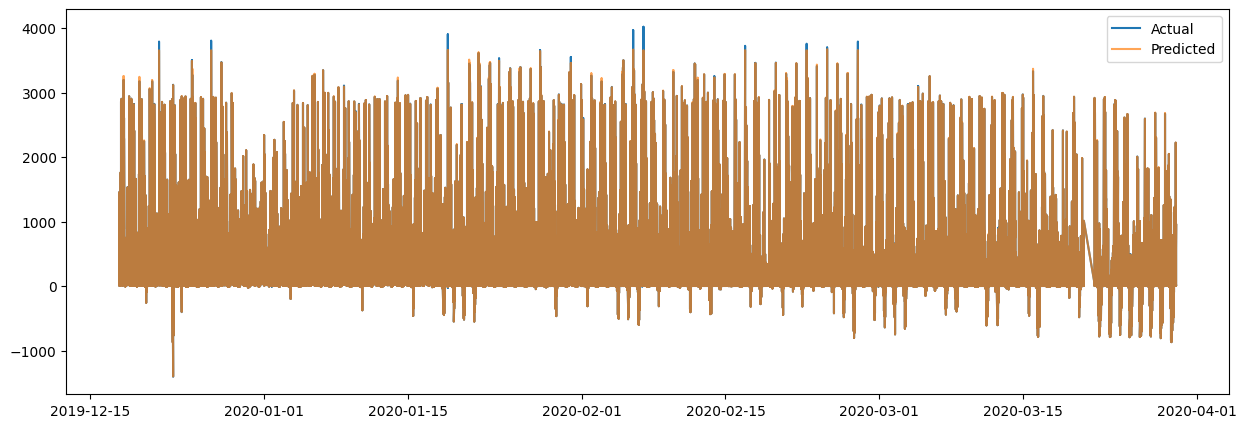

In [21]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.show()

X test and train scaled + y train

MinMaxScaler

In [26]:
# Split data into train and test sets with chronological split
train_size = int(len(df_main) * 0.8)

X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# After prediction, ensure the index for y_test is a datetime index
# This step assumes y_test originally had a datetime index
y_test.index = pd.to_datetime(y_test.index)

# Transform both the training and testing data
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()


# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [27]:
# Train
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

In [28]:
# error metric MAE
mae = mean_absolute_error(y_test, y_pred)

target_range = y_train.max() - y_train.min()
normalized_mae = mae / target_range

print(f'Normalized MAE: {normalized_mae}')
print(f'Mean Absolute Error: {mae}')

Normalized MAE: 4.1330572155350366e-05
Mean Absolute Error: 0.22903543212748181


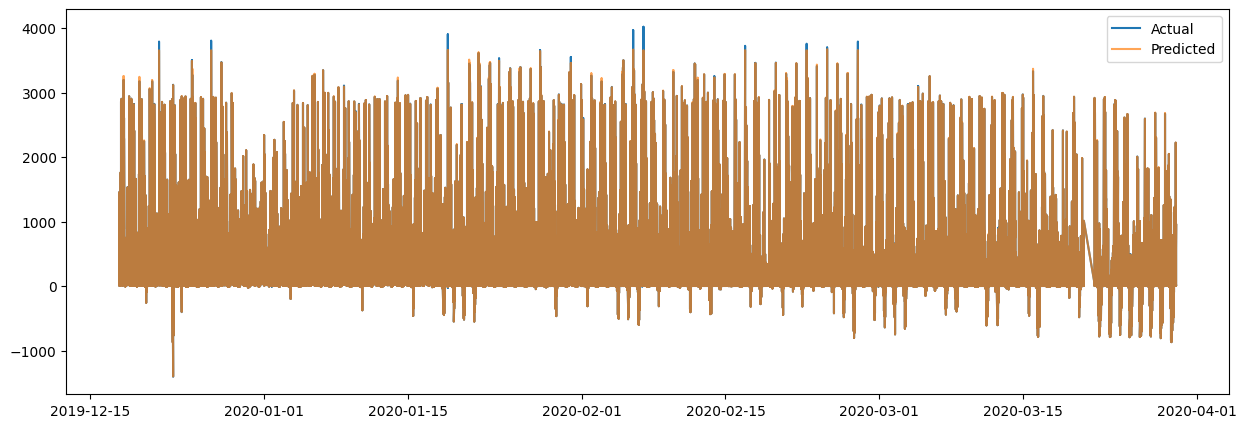

In [29]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.show()

Using RandomizedSearchCV 

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid to search
param_distributions = {
    'n_estimators': randint(100, 500),  # uniformly sample between 100 and 500 trees
    'max_depth': randint(3, 12),        # uniformly sample depths between 3 and 20
    'min_samples_split': randint(2,5),
    'min_samples_leaf': randint(1,2)
}

# Initialize RandomizedSearchCV with the RandomForestRegressor and the parameter distributions
#cv = TimeSeriesSplit(n_splits=10)????
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, 
                                   scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the random search to the data
random_search.fit(X_train_scaled, y_train)

# Best parameters found
print("Best parameters found:")
print(random_search.best_params_)

#Predictions
best_grid = random_search.best_estimator_
y_pred = random_search.predict(X_test_scaled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.show()